# Utilisation des terres associées à la production bovine par région réceptrices pour répondre à leur consommation finale entre 1995 et 2022. (Importations)

#### Vocabulaire:

**Regions sources:** les régions qui utilisent une quantité de terres pour produire des biens destinés à la consommation finale, que ce soit pour leur propre consommation interne ou pour l'exportation vers d'autres régions.
Les cartes thermiques permettent de visualiser le niveau d'exploitation intensive des régions sources pour répondre aux besoins de production.

**Régions réceptrices:** les régions qui importent des biens qui ont nécessité l'utilisation de terres dans leur production. 
Les cartes thermiques permettent de visualiser les régions réceptrices qui dépendent des importations pour satisfaire leur propre consommation finale en biens nécessitant une utilisation intensive des terres.

**Importations de terres :** Les régions réceptrices importent des terres virtuellement à travers les biens qu'elles importent pour satisfaire leur propre consommation finale. Cela signifie que ces régions utilisent des ressources terrestres situées à l'extérieur de leurs frontières pour produire des biens consommés localement.

**Exportations de terres :** Les régions sources exportent des terres virtuelles en produisant des biens destinés à la consommation finale dans d'autres régions. Cela implique que ces régions utilisent leurs ressources terrestres internes pour produire des biens exportés vers d'autres régions.

Nous voulons dans cette partie examiner la part de la consommation finale pour chaque région réceptrice qui est satisfaite par la production locale et par la production externe associée à l'utilisation des terres permettant la production du secteur bovin. Cela permet d'analyser l'auto-suffisance et les dépendances externes de chaque région pour les productions utilisant les terres au cours du temps. Cela permet d'avoir un meilleur aperçu des régions qui ont la capacité de satisfaire une grande partie de leur consommation finale et de limiter leurs importations de biens provenant du secteur bovin, mais met également en avant les régions qui dépendent économiquement d'autres régions pour répondre aux besoins de leur consommation finale.

In [1]:
#importations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import FuncFormatter
import imageio


Nous avons utilisé les bases de données en format CSV que nous avons obtenu lors du nettoyage des bases de données d'EXIOBASE3 en 1995, 2002, 2009, 2016 et 2022 afin d'obtenir les DataFrames correspondant aux niveaux des terres utilisées par le secteur bovin par chaque région réceptrice et destinés à leur consommation finale que vous pouvez retrouver ici (mettre le lien).

Pour déterminer la part d'utilisation des terres externes et internes de chaque région réceptrice pour répondre à sa consommation finale, nous avons normalisé nos [DataFrames](https://github.com/MarDrd/exiobase3-manipulation/tree/main/Impact%20-%20Consommation%20Finale/LandUse%20-%20Consommation%20Finale/LandUse%20-%20Data) en suivant ces étapes :
1. Calculer la somme de chacune de nos colonnes, qui correspondent toutes à une région réceptrice de ce type de production.
2. Diviser chaque valeur de la colonne par la somme de cette même colonne.


Cette méthode nous permet de calculer la proportion des terres internes et externes utilisées par la production du secteur bovin dans chaque région réceptrice afin de répondre à leur consommation finale. Cela permet de mesurer la part des terres utilisées importées par les régions réceptrices pour répondre à leur propre consommation finale.


In [5]:
#Fonction pour charger les bases de données cvs pour chaque année
def load(year):
    #Charger les bases de données csv
    df = pd.read_csv(f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_CattleFarming\LandUse_Data\df_CattleFarm_Imp_{year}.csv')

    #Changer l'ordre des régions pour les lignes et les colonnes
    order = ["Afrique", "Amérique Latine et Caraïbes", "Brésil", "Australie", "Mexique", "Etats-Unis", "Asie Pacifique", "Russie", "Chine", "Canada", "Moyen-Orient", "Europe", "Union européenne", "Inde", "Indonésie", "Japon"]
    df = pd.DataFrame(df, index=order)
    df = df[order]

    #Résultat de la fonction 'load'
    return df

In [16]:
#Chargement des bases de données
df_1995 = load(1995)
df_2002 = load(2002)
df_2009 = load(2009)
df_2016 = load(2016)
df_2022 = load(2022)

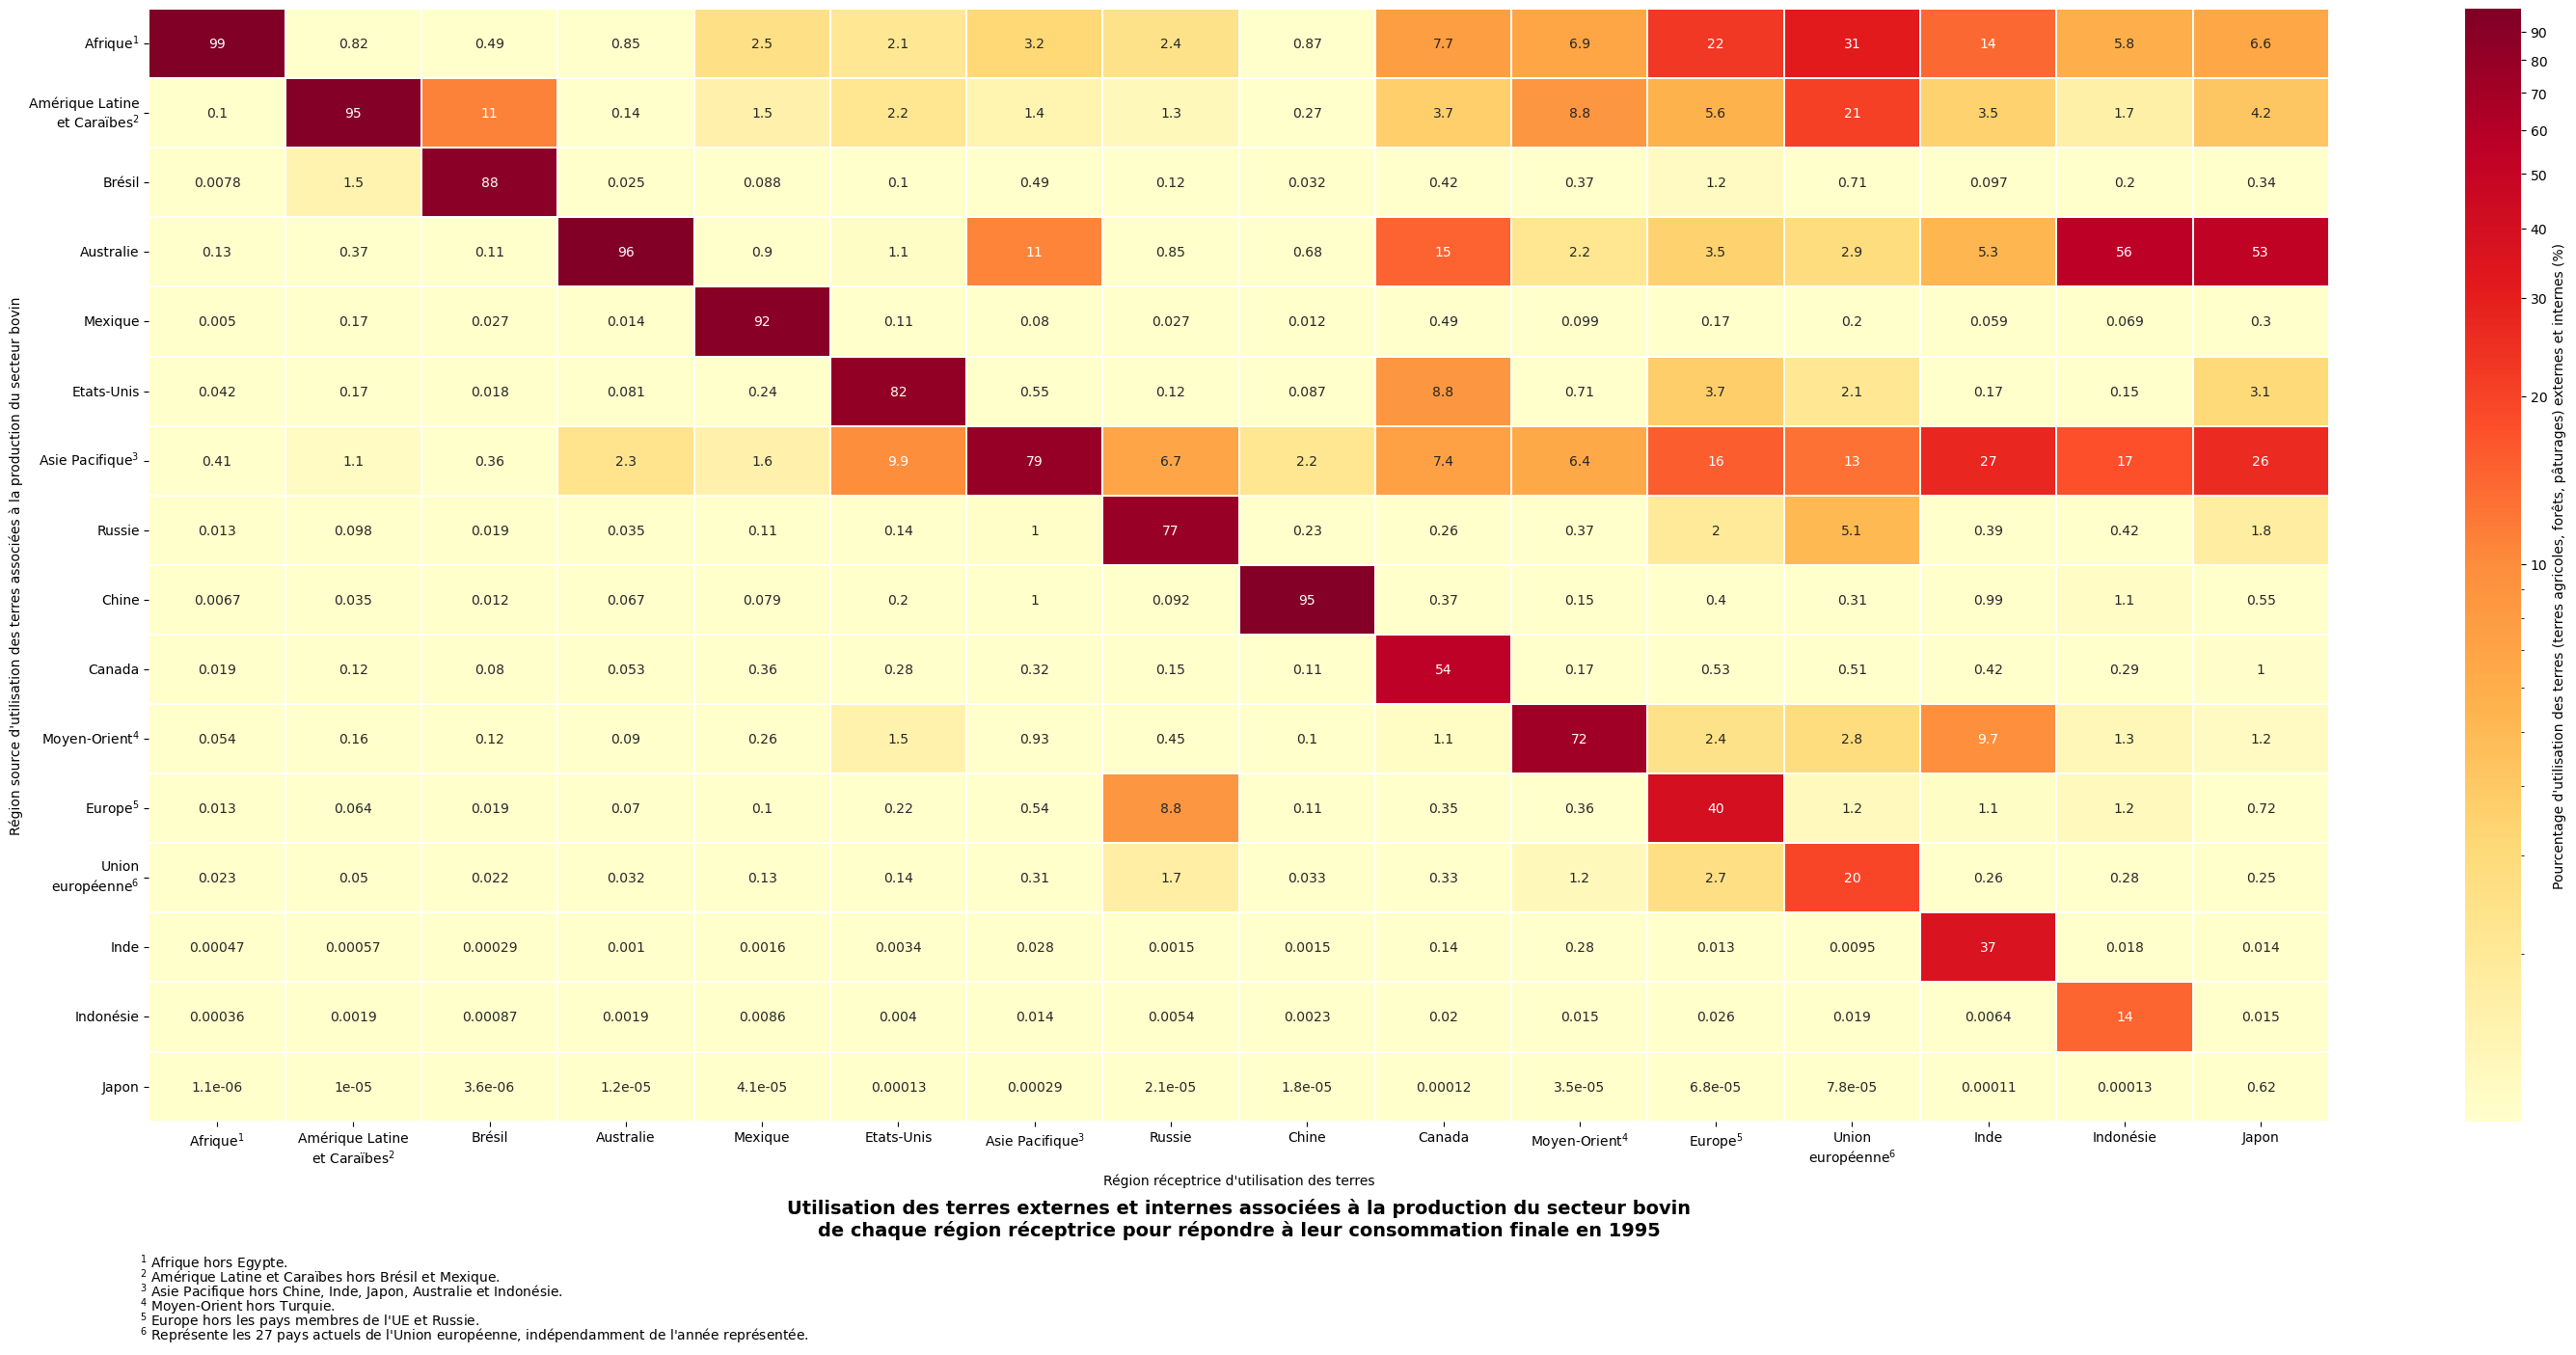

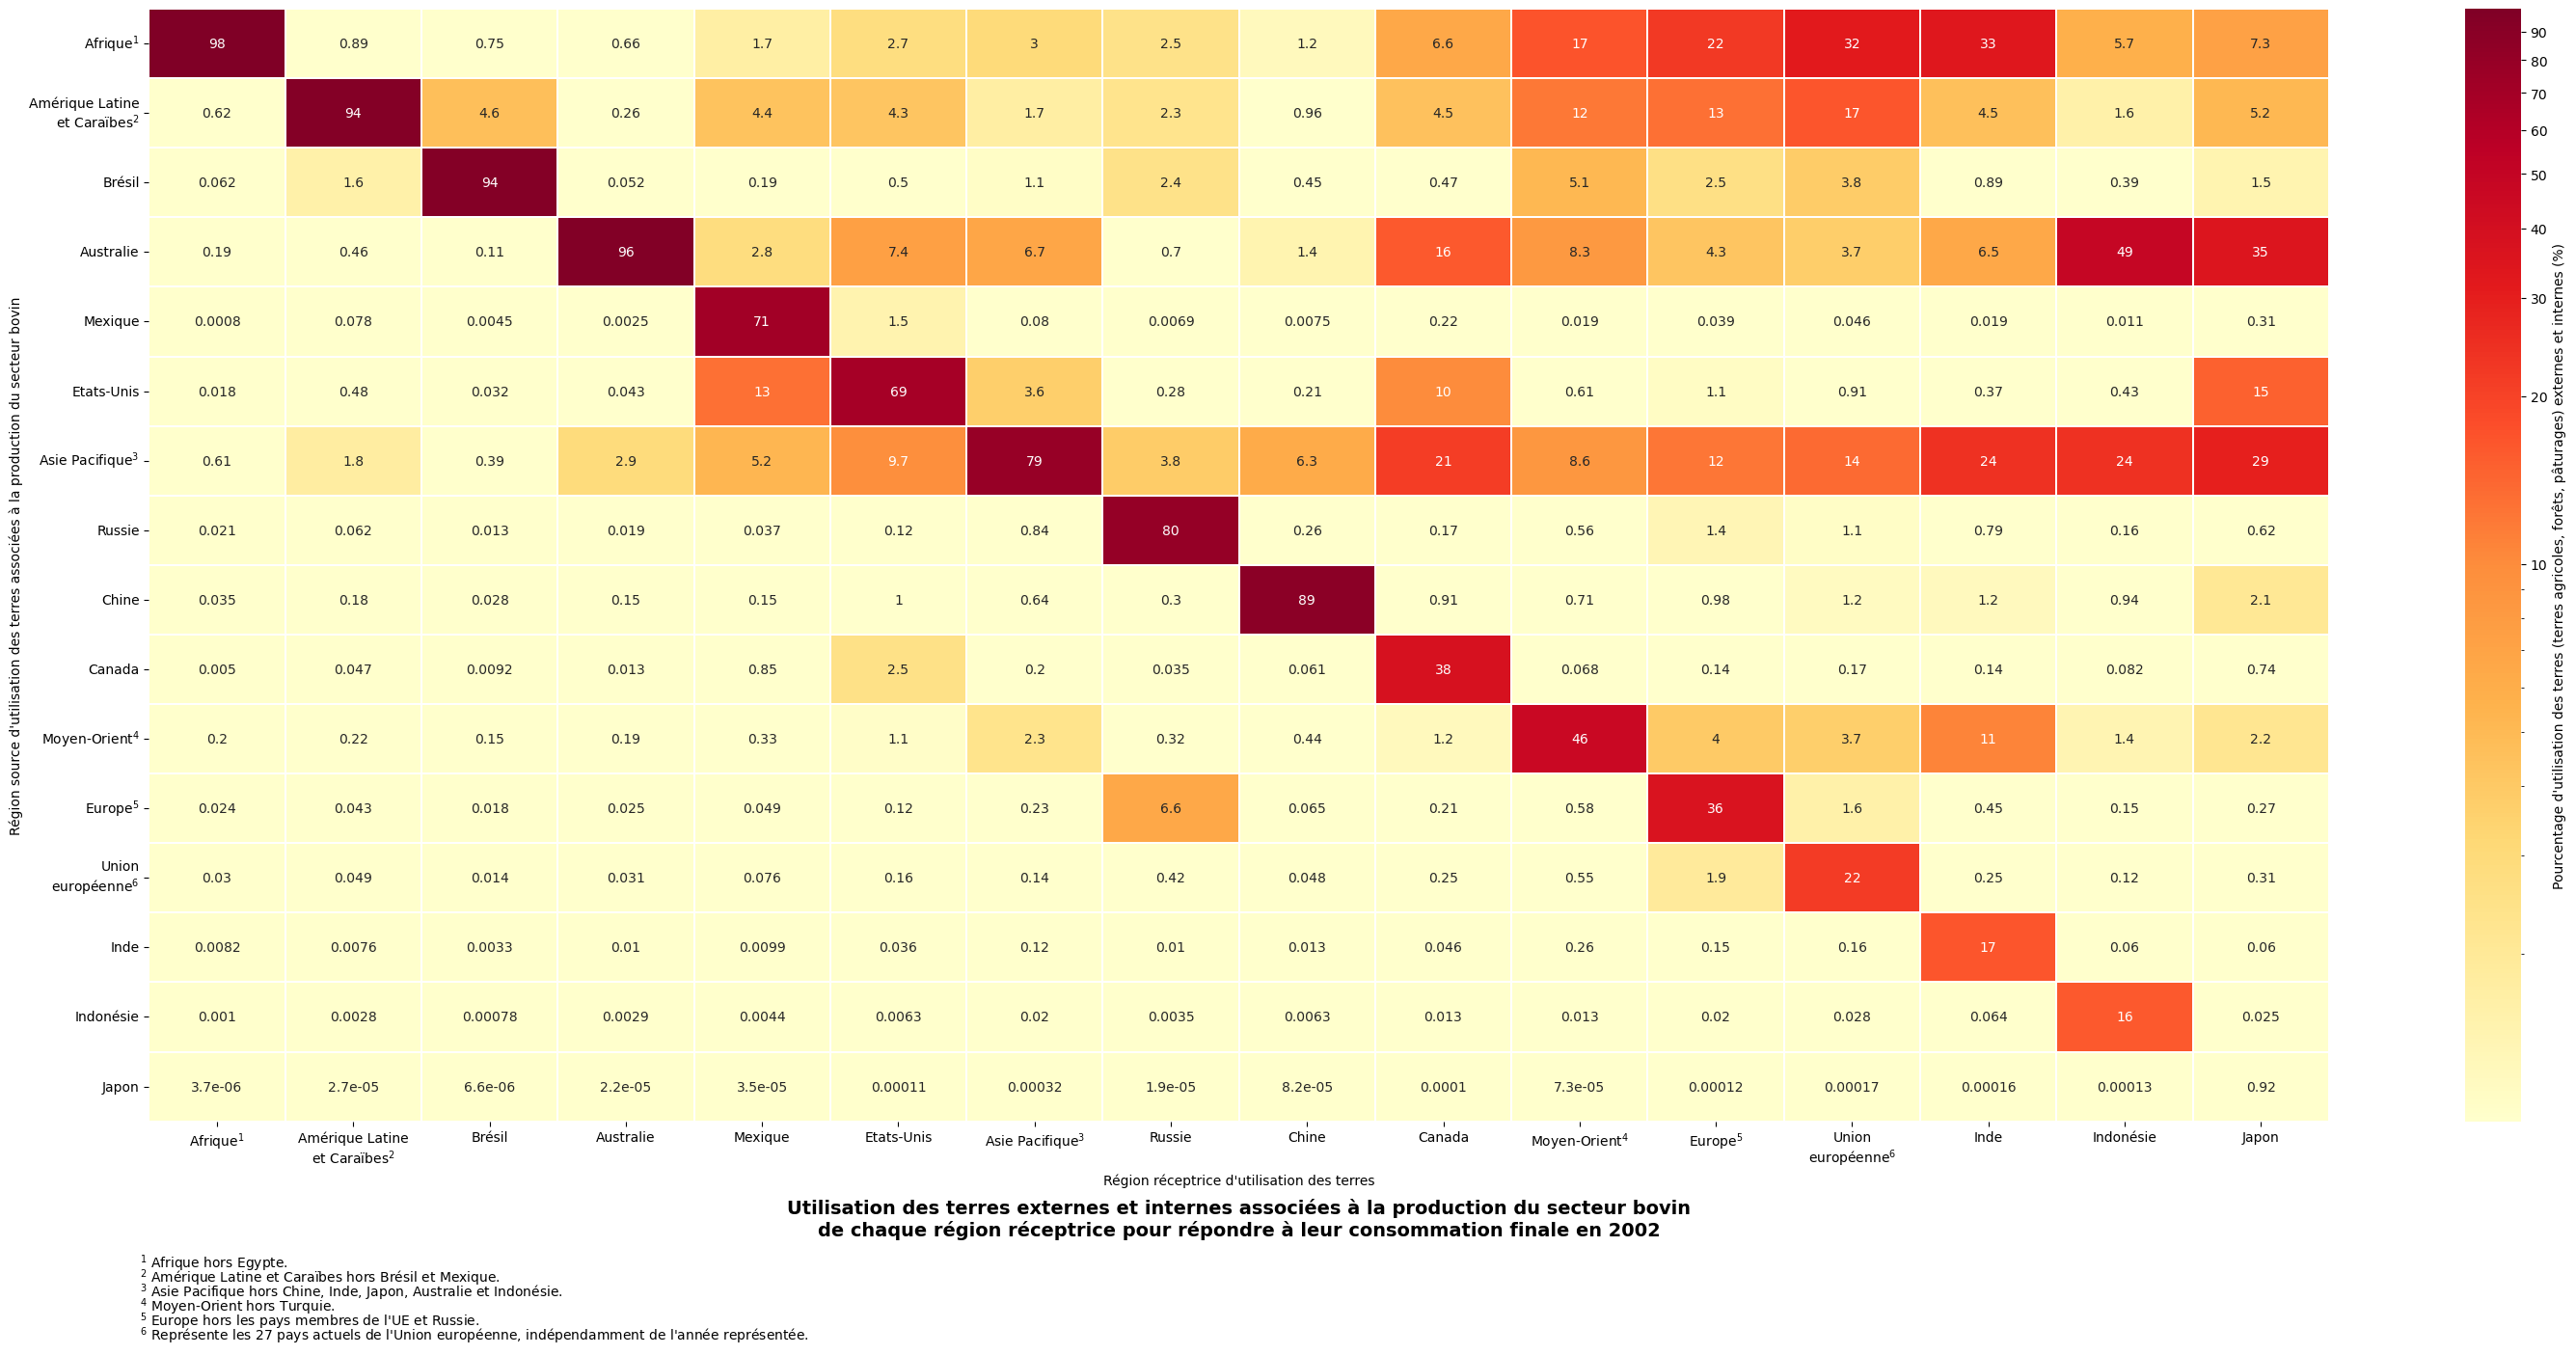

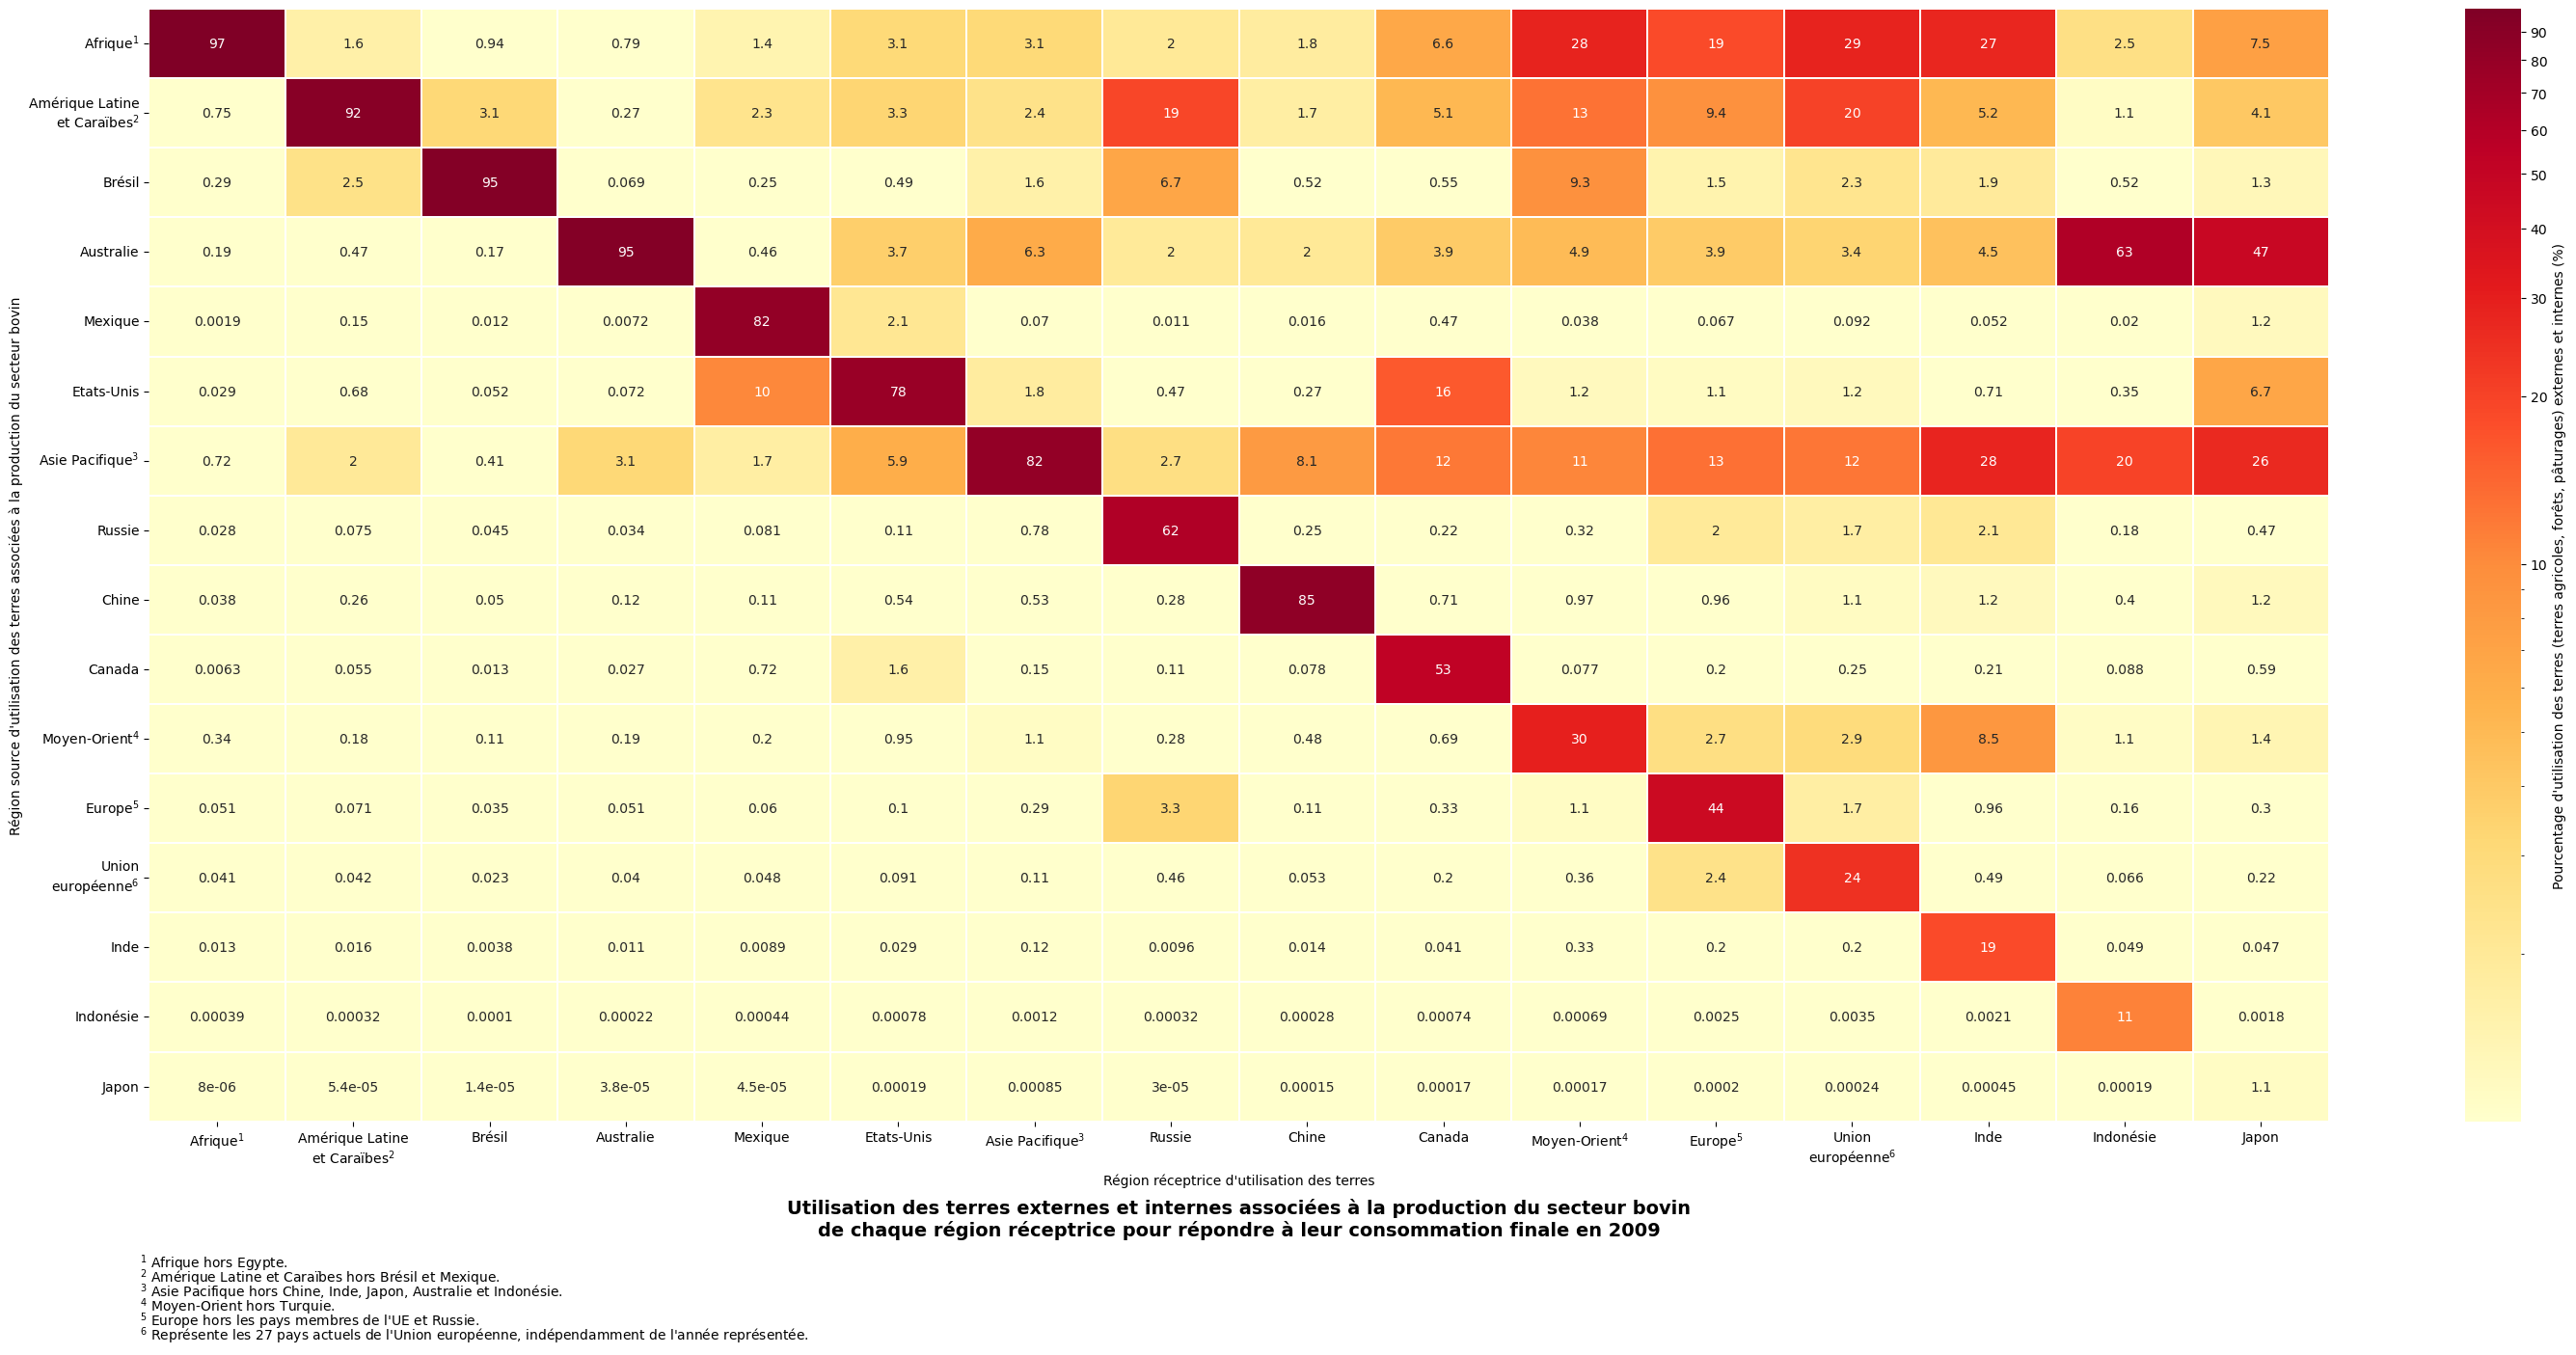

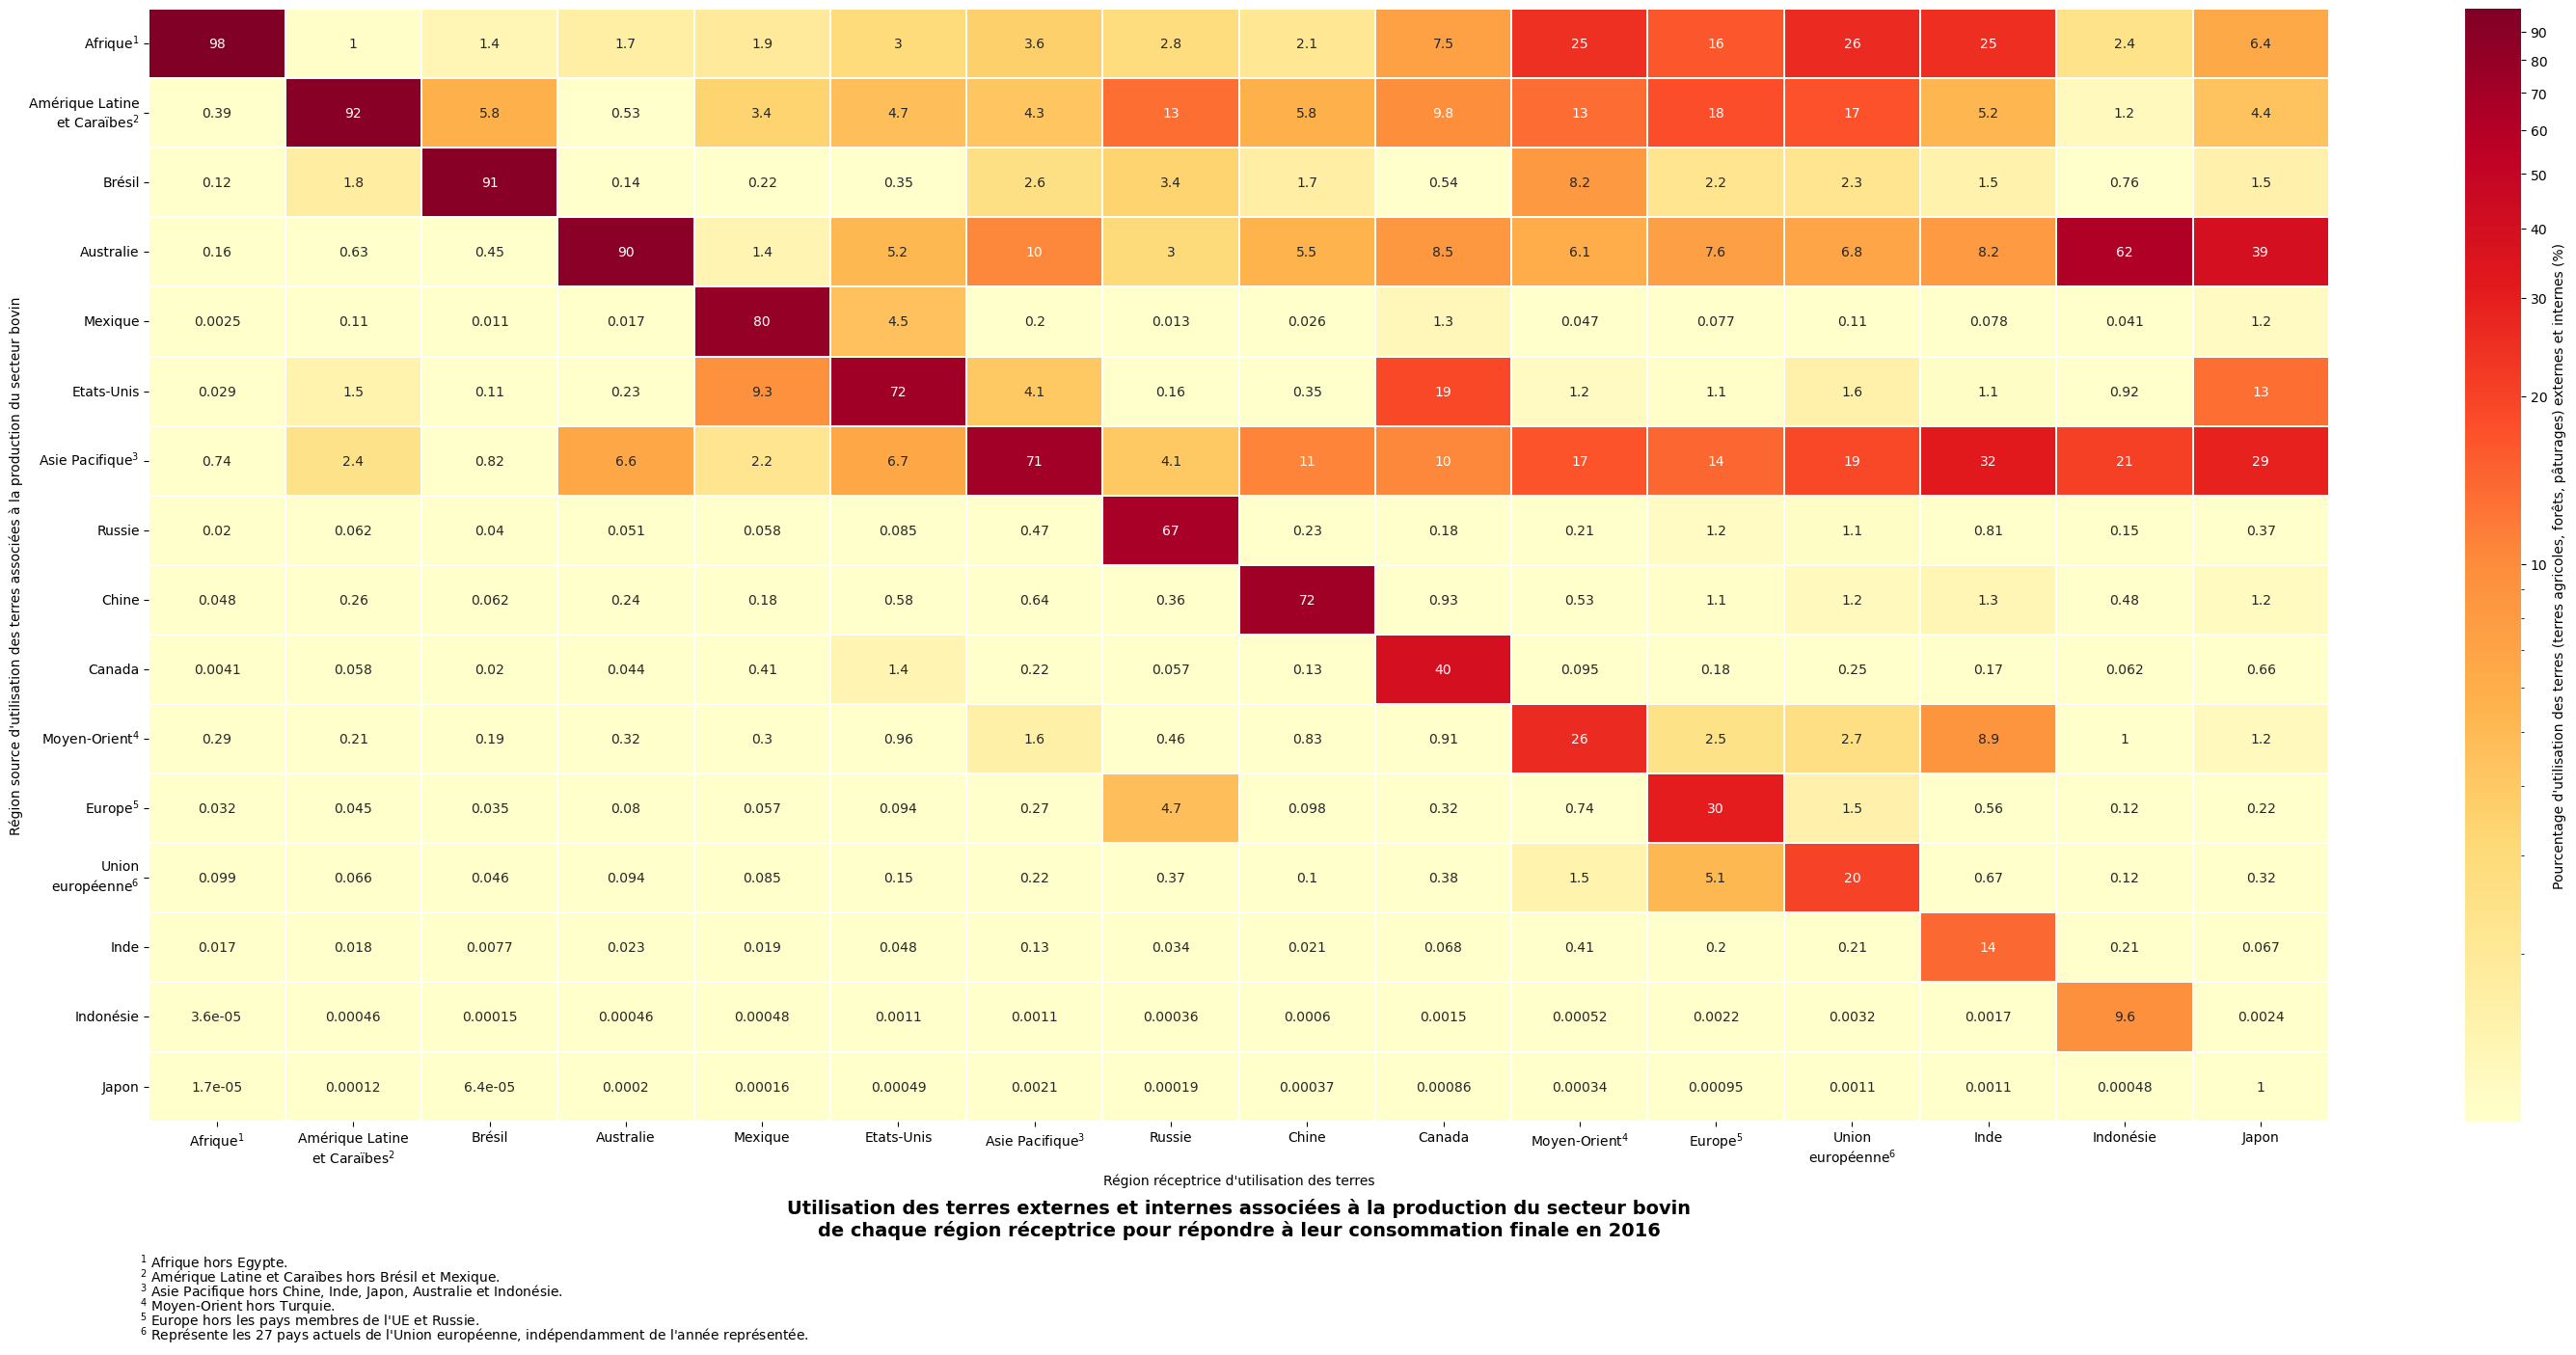

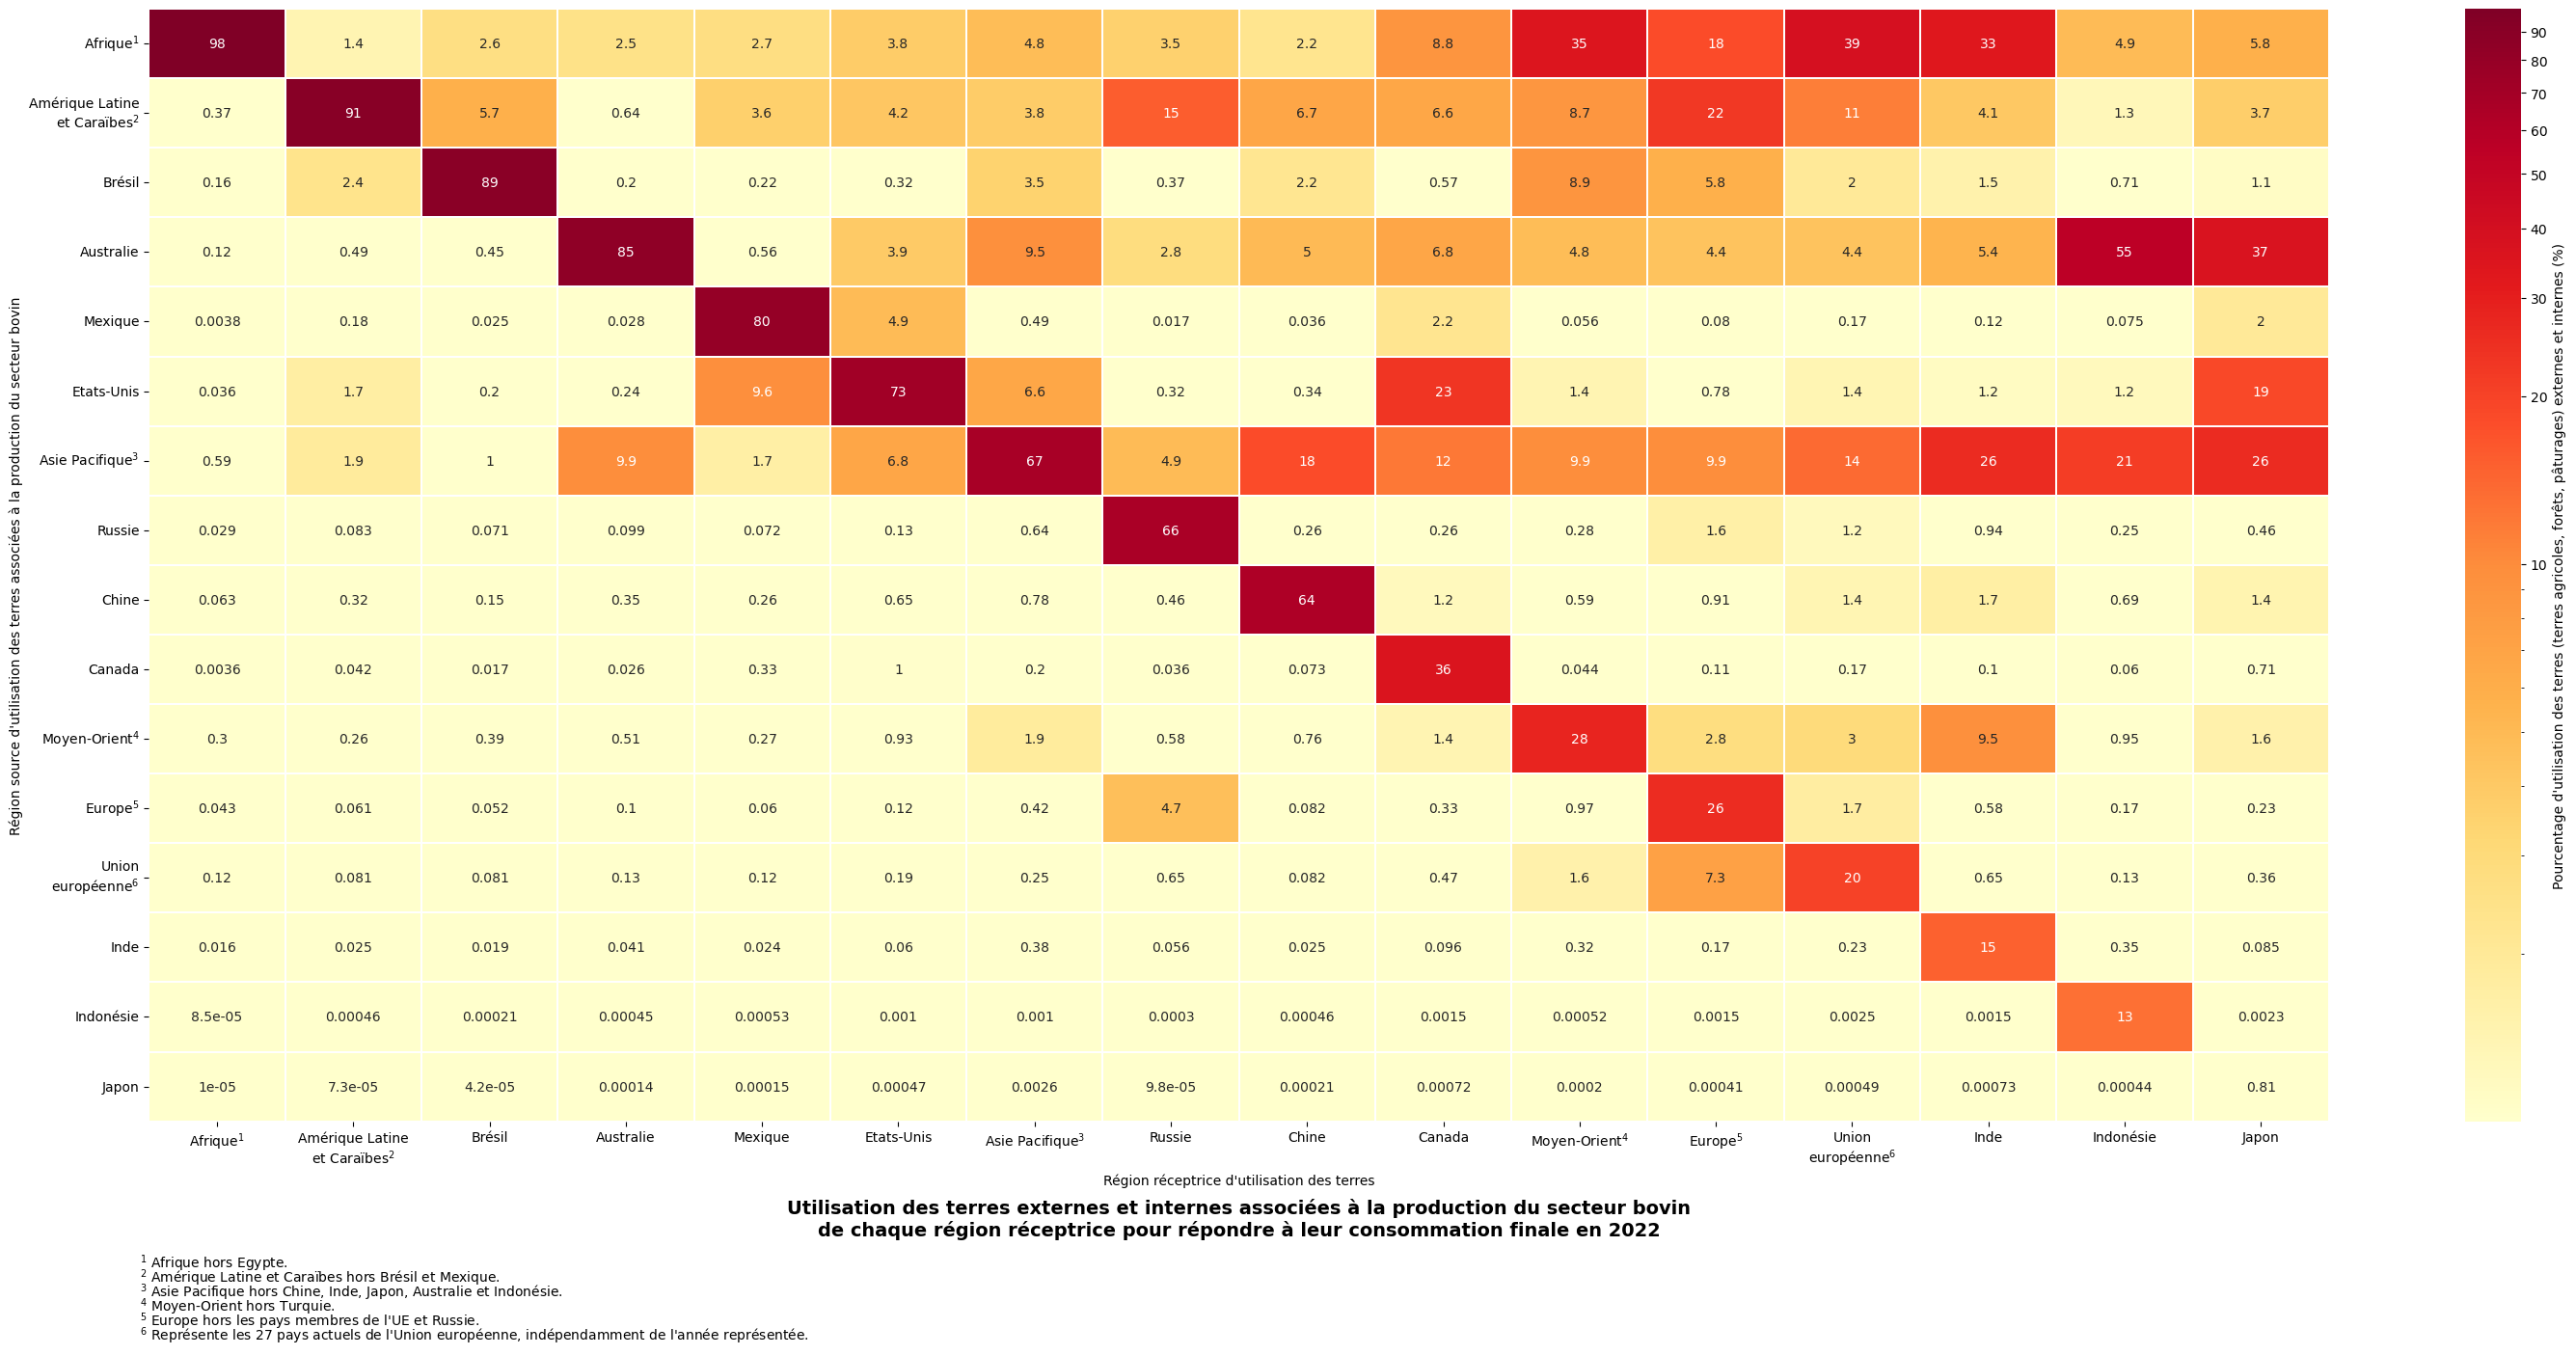

In [17]:
#Dictionnaire qui associe chaque année à une DataFrame 
dfs = {
    1995: df_1995,
    2002: df_2002,
    2009: df_2009,
    2016: df_2016,
    2022: df_2022}

#Création d'astériques
regions_ast = ["Afrique$^{1}$", "Amérique Latine\net Caraïbes$^{2}$", "Brésil", "Australie", "Mexique", "Etats-Unis", "Asie Pacifique$^{3}$",
                "Russie", "Chine", "Canada", "Moyen-Orient$^{4}$", "Europe$^{5}$", "Union\neuropéenne$^{6}$", "Inde", "Indonésie", "Japon"]


#Boucle pour créer une heatmap pour chaque année
for year, df in dfs.items():
    #Ajouter les astériques pour les lignes et les colonnes
    df.columns = regions_ast
    df.index = regions_ast

    #Label des lignes et colonnes
    df.columns.name = "Région réceptrice d'utilisation des terres"
    df.index.name = "Région source d'utilisation des terres associées à la production du secteur bovin"
    
    #Taille de la figure
    plt.figure(figsize=(30, 15))
    
    #Création d'une carte thermique des DataFrames
    sns.heatmap(df, norm=LogNorm(vmin=1, vmax=99),
                annot=True, cmap='YlOrRd', linewidths=0.1,
                cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)","format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})
    
    #Titre de la carte thermique
    plt.title(f"Utilisation des terres externes et internes associées à la production du secteur bovin\nde chaque région réceptrice pour répondre à leur consommation finale en {year}", fontsize=14, fontweight='bold', y=-0.11)

    #Permet d'ajuster la positions des éléments de la carte thermique
    plt.subplots_adjust(bottom=0.3)
    
    #Création des notes en bas de pages associées aux astériques
    plt.figtext(0.05, 0.07, "$^{1}$ Afrique hors Egypte.", fontsize=10)
    plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique.", fontsize=10)
    plt.figtext(0.05, 0.05, '$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie.', fontsize=10)
    plt.figtext(0.05, 0.04, '$^{4}$ Moyen-Orient hors Turquie.', fontsize=10)
    plt.figtext(0.05, 0.03, "$^{5}$ Europe hors les pays membres de l'UE et Russie.", fontsize=10)
    plt.figtext(0.05, 0.02, "$^{6}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=10)

    #Ajuster l'espacements des éléments de la carte thermique
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
    #Sauvegarder la carte de thermique
    frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_CattleFarming\LandUse_CattleFarm_Imp_heatmap\df_Imp_{year}.png'
    plt.savefig(frame_filename, bbox_inches='tight')

    #Pour montrer les cartes thermiques
    plt.show()


In [8]:
#Initialisation : liste vide pour stocker les images créées
images = []

#Création d'une boucle pour chaque année du dictionnaire 'dfs'
for year in dfs.keys():
    frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_CattleFarming\LandUse_CattleFarm_Imp_heatmap\df_Imp_{year}.png'
    #Charge l'image et l'ajoute à la liste 'images'
    images.append(imageio.imread(frame_filename))

#Nom du fichier GIF
gif_filename = 'LandUse_CattleFarm_Imp_heatmap.gif'

#Création du GIF
imageio.mimsave(gif_filename, images, duration=1000, loop=0)

C:\Users\Marie\AppData\Local\Temp\ipykernel_5540\2631266685.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(frame_filename))


In [13]:
order = ["Afrique", "Amérique Latine et Caraïbes", "Brésil", "Australie", "Mexique", "Etats-Unis", "Asie Pacifique", "Russie", "Chine", "Canada", "Moyen-Orient", "Europe", "Union européenne", "Inde", "Indonésie", "Japon"]

# Initialiser un DataFrame vide pour stocker les valeurs diagonales
dfs_diag = pd.DataFrame(index=order)

# Parcourir chaque année et DataFrame dans le dictionnaire dfs
for year, df in dfs.items():
    # Extraire les valeurs diagonales
    diagonal_val = df.values.diagonal()
    
    # Créer une DataFrame avec les valeurs de la diagonale
    df_diag = pd.DataFrame(diagonal_val, index=order, columns=[f'{year}'])
    
    # Ajouter cette DataFrame à df_diag
    dfs_diag = pd.concat([dfs_diag, df_diag], axis=1)

In [10]:
dfs_diag

,1995,2002,2009,2016,2022
Afrique,99.180754,98.176956,97.496795,98.046903,98.142744
Amérique Latine et Caraïbes,95.348809,94.148276,91.966531,91.796390,91.032159
Brésil,87.737662,93.849711,95.014308,91.072410,89.185857
Australie,96.237580,95.645808,95.186113,89.935521,85.206890
Mexique,92.091134,71.216018,82.090165,80.398488,80.456069
Etats-Unis,82.021614,68.833439,77.943419,72.210188,72.891111
Asie Pacifique,79.292446,79.179107,81.566640,71.221524,66.759840
Russie,77.308774,80.317206,62.470650,67.468835,66.160141
Chine,95.281332,88.528578,84.562167,72.312083,64.126412
Canada,54.235895,38.059825,53.259616,40.301456,35.968350


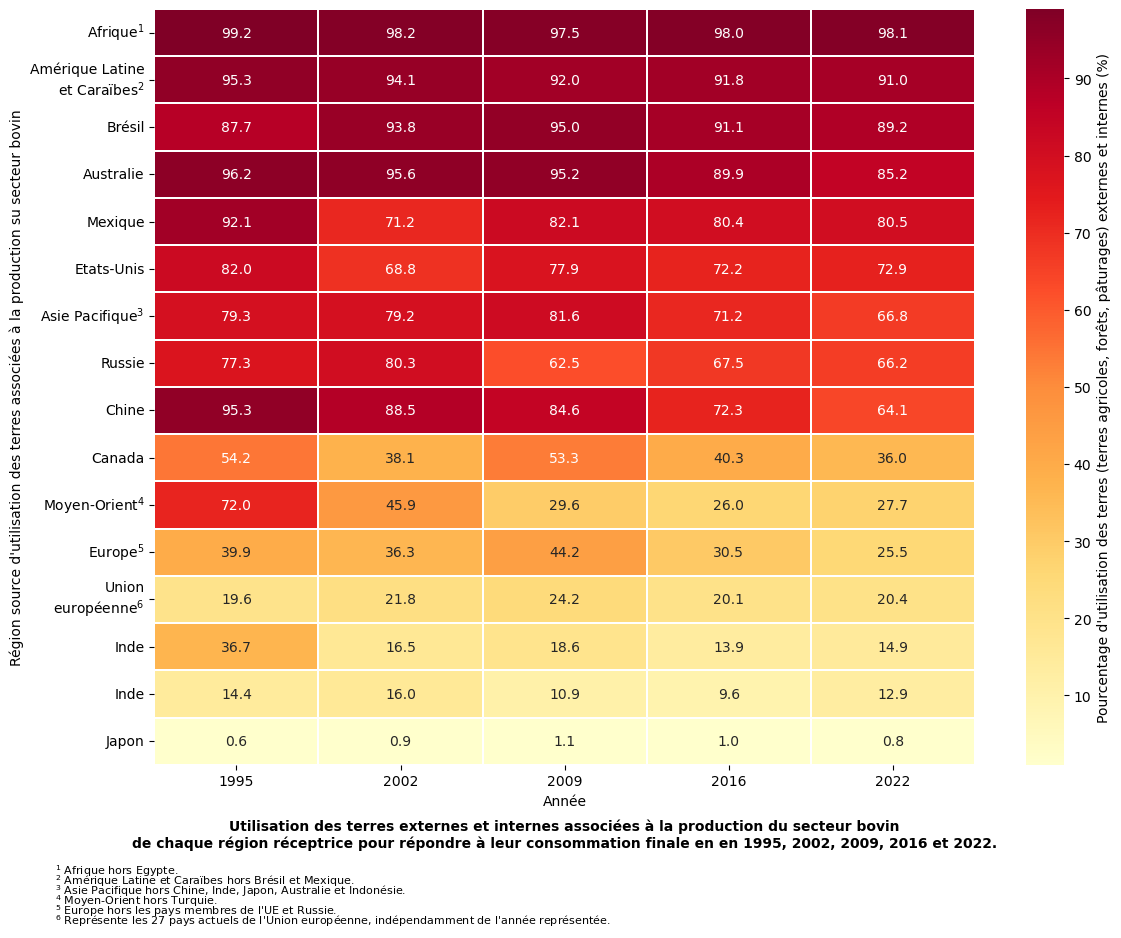

In [11]:
#Création des astériques
regions_ast = ["Afrique$^{1}$", "Amérique Latine\net Caraïbes$^{2}$", "Brésil", "Australie", "Mexique", "Etats-Unis", "Asie Pacifique$^{3}$",
                "Russie", "Chine", "Canada", "Moyen-Orient$^{4}$", "Europe$^{5}$", "Union\neuropéenne$^{6}$", "Inde", "Inde", "Japon"]
    
#Modifier le noms des régions des lignes avec la liste 'region_ast'
dfs_diag.index = regions_ast

#Donner un noms aux colonnes et aux lignes
dfs_diag.columns.name = "Année"
dfs_diag.index.name = "Région source d'utilisation des terres associées à la production su secteur bovin"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(12, 10))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(dfs_diag, vmin=1, vmax=99,
            annot=True,fmt = '.1f', cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
            "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes associées à la production du secteur bovin\nde chaque région réceptrice pour répondre à leur consommation finale en en 1995, 2002, 2009, 2016 et 2022.", fontsize=10, fontweight='bold', y=-0.12)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.05, 0.07, "$^{1}$ Afrique hors Egypte.", fontsize=8)
plt.figtext(0.05, 0.06, "$^{2}$ Amérique Latine et Caraïbes hors Brésil et Mexique.", fontsize=8)
plt.figtext(0.05, 0.05, '$^{3}$ Asie Pacifique hors Chine, Inde, Japon, Australie et Indonésie.', fontsize=8)
plt.figtext(0.05, 0.04, '$^{4}$ Moyen-Orient hors Turquie.', fontsize=8)
plt.figtext(0.05, 0.03, "$^{5}$ Europe hors les pays membres de l'UE et Russie.", fontsize=8)
plt.figtext(0.05, 0.02, "$^{6}$ Représente les 27 pays actuels de l'Union européenne, indépendamment de l'année représentée.", fontsize=8)


#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_CattleFarming\LandUse_CattleFarm_Imp_heatmap\df_Imp_All.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()


In [14]:
dfs_diag = dfs_diag.loc[['Australie', 'Mexique', 'Russie', 'Chine', 'Moyen-Orient','Europe', 'Inde']]


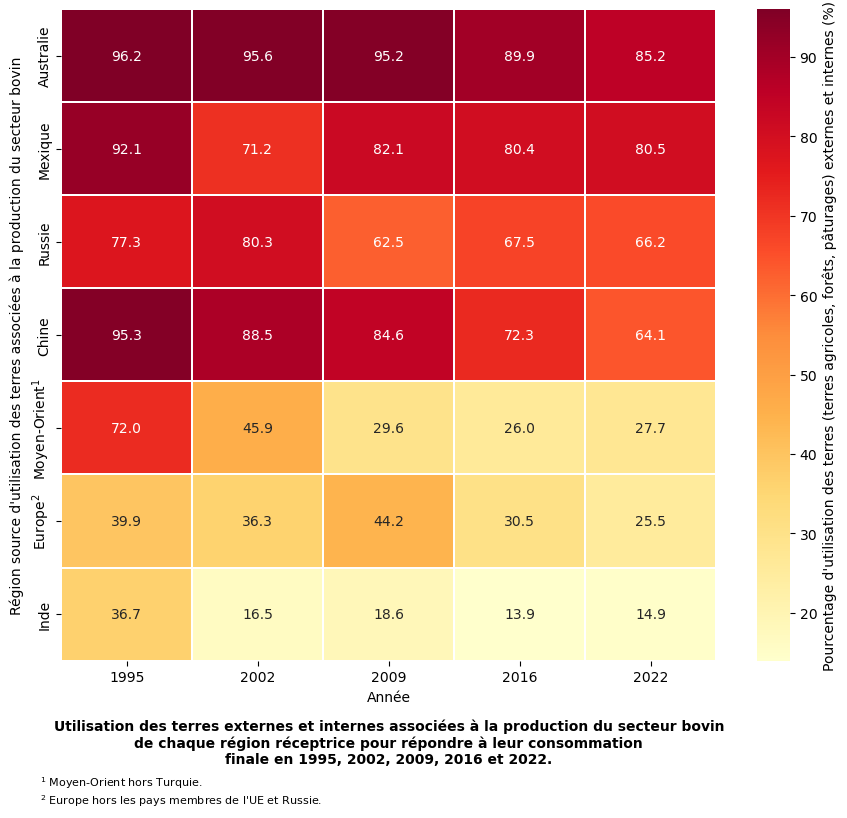

In [15]:
#Création des astériques
regions_ast = ['Australie', 'Mexique', 'Russie', 'Chine', 'Moyen-Orient$^{1}$','Europe$^{2}$', 'Inde']
    
    
#Modifier le noms des régions  des lignes avec la liste 'region_ast'
dfs_diag.index = regions_ast

#Donner un noms aux colonnes et aux lignes
dfs_diag.columns.name = "Année"
dfs_diag.index.name = "Région source d'utilisation des terres associées à la production du secteur bovin"
    
#Modifier la taille de la carte thermique
plt.figure(figsize=(9, 9))
    
#Création d'une carte thermique des DataFrames
sns.heatmap(dfs_diag, vmin=14, vmax=96,
            annot=True, fmt = '.1f',  cmap='YlOrRd', linewidths=0.1,
            cbar_kws={"label": "Pourcentage d'utilisation des terres (terres agricoles, forêts, pâturages) externes et internes (%)",
            "format": FuncFormatter(lambda x, _: f'{x:.0f}'), "ticks": range(10, 100, 10)})

#Titre de la carte thermique
plt.title(f"Utilisation des terres externes et internes associées à la production du secteur bovin\nde chaque région réceptrice pour répondre à leur consommation\nfinale en 1995, 2002, 2009, 2016 et 2022.", fontsize=10, fontweight='bold', y=-0.17)

#Permet d'ajuster la positions des éléments de la carte thermique
plt.subplots_adjust(bottom=0.3)
    
#Création des notes en bas de pages associées aux astériques
plt.figtext(0.05, 0.07, "$^{1}$ Moyen-Orient hors Turquie.", fontsize=8)
plt.figtext(0.05, 0.05, "$^{2}$ Europe hors les pays membres de l'UE et Russie.", fontsize=8)

#Ajuster l'espacements des éléments de la carte thermique
plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    
#Sauvegarder la carte de thermique
frame_filename = f'C:\Master 1\exiobase3-manipulation\Impact - Consommation Finale\LandUse - Consommation Finale\LandUse_CattleFarming\LandUse_CattleFarm_Imp_heatmap\df_Imp_Sorted.png'
plt.savefig(frame_filename, bbox_inches='tight')

#Afficher la heatmap
plt.show()
